In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import requests


def fetch_json(url):
    return requests.get(url).json()    

def get_freq():
    url = 'http://minikep-db.herokuapp.com/api/freq'
    return fetch_json(url)

def get_names(freq):
    url = 'http://minikep-db.herokuapp.com/api/names/{}'.format(freq)
    return fetch_json(url)

def make_url(freq, name, format):    
    return ('https://minikep-db.herokuapp.com/api/datapoints'
            '?name={}&freq={}&format={}'.format(name, freq, format))

def get_datapoints(freq, name):
    url = make_url(freq, name, 'json') 
    return fetch_json(url)
    
def read_from_url(url):
    """Read pandas time series from *source_url*."""
    return pd.read_csv(url, converters={0: pd.to_datetime}, index_col=0, squeeze=True)
 
def get_ts(freq, name):  
    url = make_url(freq, name, 'csv')
    return read_from_url(url)
    
def get_df_by_names(freq, names):
    df_list = [get_ts(freq, name).to_frame() for name in names]
    df = df_list[0]
    for right_df in df_list[1:]:
       df = df.join(right_df, how='outer')
    return df  

def get_df(freq):
    names = get_names(freq)
    return get_df_by_names(freq, names)

In [2]:
variable_names_quarterly = get_names('q')
ts = get_ts('q', 'GDP_yoy')
dfq = get_df('q')    
print(dfq.columns)

Index(['CPI_ALCOHOL_rog', 'CPI_FOOD_rog', 'CPI_NONFOOD_rog', 'CPI_rog',
       'CPI_SERVICES_rog', 'EXPORT_GOODS_bln_usd', 'GDP_bln_rub', 'GDP_yoy',
       'GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub',
       'GOV_EXPENSE_ACCUM_FEDERAL_bln_rub',
       'GOV_EXPENSE_ACCUM_SUBFEDERAL_bln_rub',
       'GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub',
       'GOV_REVENUE_ACCUM_FEDERAL_bln_rub',
       'GOV_REVENUE_ACCUM_SUBFEDERAL_bln_rub',
       'GOV_SURPLUS_ACCUM_FEDERAL_bln_rub',
       'GOV_SURPLUS_ACCUM_SUBFEDERAL_bln_rub', 'IMPORT_GOODS_bln_usd',
       'INDPRO_rog', 'INDPRO_yoy', 'INVESTMENT_bln_rub', 'INVESTMENT_rog',
       'INVESTMENT_yoy', 'RETAIL_SALES_bln_rub', 'RETAIL_SALES_FOOD_bln_rub',
       'RETAIL_SALES_FOOD_rog', 'RETAIL_SALES_FOOD_yoy',
       'RETAIL_SALES_NONFOOD_bln_rub', 'RETAIL_SALES_NONFOOD_rog',
       'RETAIL_SALES_NONFOOD_yoy', 'RETAIL_SALES_rog', 'RETAIL_SALES_yoy',
       'TRANSPORT_FREIGHT_bln_tkm', 'UNEMPL_pct', 'WAGE_NOMINAL_rub',
       'WAGE_REAL_rog', 'WAGE_REAL

pick some macroeconomic indicators

In [3]:
need_cols = ['EXPORT_GOODS_bln_usd', 'GDP_bln_rub', 
       'GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub',
       'GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub',
       'IMPORT_GOODS_bln_usd',
       'INVESTMENT_bln_rub', 
       'RETAIL_SALES_bln_rub']

In [4]:
dfq = dfq[need_cols]

In [5]:
dfq.head()

,EXPORT_GOODS_bln_usd,GDP_bln_rub,GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub,GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub,IMPORT_GOODS_bln_usd,INVESTMENT_bln_rub,RETAIL_SALES_bln_rub
1999-03-31,15.3,901.0,189.0,171.9,9.1,96.8,379.0
1999-06-30,17.1,1102.0,486.8,448.6,10.1,131.1,416.5
1999-09-30,18.9,1373.0,795.8,759.3,9.5,185.6,464.6
1999-12-31,24.3,1447.0,1258.0,1213.6,10.8,256.9,537.3
2000-03-31,23.9,1527.0,330.2,366.5,10.0,165.8,517.7


In [6]:
dfq.tail()

,EXPORT_GOODS_bln_usd,GDP_bln_rub,GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub,GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub,IMPORT_GOODS_bln_usd,INVESTMENT_bln_rub,RETAIL_SALES_bln_rub
2016-06-30,67.9,20430.0,13582.9,12521.5,45.6,3153.3,6764.0
2016-09-30,70.9,22721.0,20493.6,19374.5,52.6,3666.5,7258.1
2016-12-31,82.6,24077.0,31323.7,28181.5,55.3,5726.5,7798.9
2017-03-31,82.4,20091.0,6892.4,7036.6,48.0,2202.2,6746.9
2017-06-30,83.8,NaN,14443.0,14507.5,58.6,3521.5,7129.1


setting datetime index

In [7]:
index = pd.DatetimeIndex(start='1999Q1', end='2017Q3', freq='Q')

In [8]:
dfq.set_index(index, inplace = True)

In [9]:
dfq.head()

,EXPORT_GOODS_bln_usd,GDP_bln_rub,GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub,GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub,IMPORT_GOODS_bln_usd,INVESTMENT_bln_rub,RETAIL_SALES_bln_rub
1999-03-31,15.3,901.0,189.0,171.9,9.1,96.8,379.0
1999-06-30,17.1,1102.0,486.8,448.6,10.1,131.1,416.5
1999-09-30,18.9,1373.0,795.8,759.3,9.5,185.6,464.6
1999-12-31,24.3,1447.0,1258.0,1213.6,10.8,256.9,537.3
2000-03-31,23.9,1527.0,330.2,366.5,10.0,165.8,517.7


In [43]:
dfq.tail()

,EXPORT_GOODS_bln_usd,GDP_bln_rub,GOV_EXPENSE_ACCUM_CONSOLIDATED_bln_rub,GOV_REVENUE_ACCUM_CONSOLIDATED_bln_rub,IMPORT_GOODS_bln_usd,INVESTMENT_bln_rub,RETAIL_SALES_bln_rub
2016-06-30,67.9,20430.0,13582.9,12521.5,45.6,3153.3,6764.0
2016-09-30,70.9,22721.0,20493.6,19374.5,52.6,3666.5,7258.1
2016-12-31,82.6,24077.0,31323.7,28181.5,55.3,5726.5,7798.9
2017-03-31,82.4,20091.0,6892.4,7036.6,48.0,2202.2,6746.9
2017-06-30,83.8,NaN,14443.0,14507.5,58.6,3521.5,7129.1


drop last observation (nan value)

In [10]:
gdp = dfq.GDP_bln_rub[:'2017-03-31']

In [11]:
import statsmodels.api as sm


C:\Users\User3\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


decomposing series using HP filter

In [12]:
cycle, trend = sm.tsa.filters.hpfilter(gdp, 1600)

calculating average deviation from trend

In [13]:
import numpy as np
std_ = np.mean(abs(100 - trend/gdp * 100))

plotting std_ and real valu

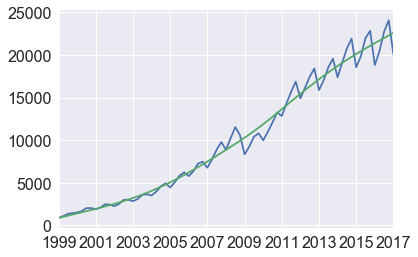

In [14]:
%matplotlib inline
fig, ax = plt.subplots()

gdp.plot(ax=ax, fontsize=16)
trend.plot(ax=ax, fontsize=16)


function for crosscorrelation with lags

In [41]:
def crosscorr(datax, datay):
    
    return "{0:.2f}".format(datax.corr(datay.shift(-1))), "{0:.2f}".format(datax.corr(datay)), "{0:.2f}".format(datax.corr(datay.shift(1)))

In [42]:
crosscorr(gdp, gdp)

('0.98', '1.00', '0.98')

function to calculate deviation from trend

In [44]:
def deviation(var):
    cycle, trend = sm.tsa.filters.hpfilter(var, 1600)
    std_ = np.mean(abs(100 - trend/var * 100))
    return "{0:.1f}".format(std_)

In [45]:
deviation(gdp)

'7.4'